<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 1 декабря 23:59 [уточняется]**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [710]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

**Ответ**: Для воспроизводимости. Чтобы код можно было запустить на другой машине с теми же данными и получить одинаковые результаты

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [711]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [712]:
df_train['torque'].str.contains('kgm')

0       False
1       False
2        True
3        True
4       False
        ...  
6994    False
6995     True
6996    False
6997    False
6998    False
Name: torque, Length: 6999, dtype: object

### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [713]:
df_train.sample(n=10, random_state=42)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [714]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [715]:
df_train.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [716]:
df_train.isna().sum()[df_train.isna().sum() > 0]

mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

In [717]:
df_train.duplicated().sum()

np.int64(985)

In [718]:
# from ydata_profiling import ProfileReport

# profile_report = ProfileReport(df_train, title='Pandas Profiling Report')

Дубликаты имеются, общее количество 985

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [719]:
columns_with_na = df_train.isna().sum()[df_train.isna().sum() > 0].index.to_list()
df_train[columns_with_na].dtypes

mileage       object
engine        object
max_power     object
torque        object
seats        float64
dtype: object

Cтолбцы с пропусками имеют тип object в связи с наличием единиц измерений. Приведем их к типу float

In [720]:
# извлечем числовые признаки
df_train['mileage'] = df_train['mileage'].str.extract(r'(\d+(\.\d+)?)')[0].astype(float)
df_train['engine'] = df_train['engine'].str.replace(' CC', '', regex=False).astype(float)
df_train['max_power'] = pd.to_numeric(df_train['max_power'].str.replace(' bhp', '', regex=False), errors='coerce')

df_test['mileage'] = df_test['mileage'].str.extract(r'(\d+(\.\d+)?)')[0].astype(float)
df_test['engine'] = df_test['engine'].str.replace(' CC', '', regex=False).astype(float)
df_test['max_power'] = pd.to_numeric(df_test['max_power'].str.replace(' bhp', '', regex=False), errors='coerce')

# поскольку значения torque даны в разных единицах измерения (Нм и гкм) приведем их к единой системе (Нм)
def parse_torque(value):
    if pd.notna(value):
        kgm_match = pd.Series(value).str.extract(r'(\d+(\.\d+)?)\s*kgm')
        nm_match = pd.Series(value).str.extract(r'(\d+(\.\d+)?)\s*Nm')
        
        if not kgm_match.empty and kgm_match[0].notna().any():
            kgm_value = float(kgm_match[0].iloc[0])
            return kgm_value * 9.80665
        elif not nm_match.empty and nm_match[0].notna().any():
            return float(nm_match[0].iloc[0])
    
    return None

df_train['torque'] = df_train['torque'].apply(parse_torque).astype(float)

df_test['torque'] = df_test['torque'].apply(parse_torque).astype(float)

# переименуем колонку, чтобы была понятная единица измерения
df_train.rename(columns={'mileage': 'mileage (kmpl)'}, inplace=True)
df_test.rename(columns={'mileage': 'mileage (kmpl)'}, inplace=True)

df_train.rename(columns={'engine': 'engine (СС)'}, inplace=True)
df_test.rename(columns={'engine': 'engine (СС)'}, inplace=True)

df_train.rename(columns={'max_power': 'max_power (bhp)'}, inplace=True)
df_test.rename(columns={'max_power': 'max_power (bhp)'}, inplace=True)

df_train.rename(columns={'torque': 'torque (Nm)'}, inplace=True)
df_test.rename(columns={'torque': 'torque (Nm)'}, inplace=True)

In [721]:
import warnings
warnings.filterwarnings("ignore")

# заменим пропуски на средние значения
mileage_mean = df_train['mileage (kmpl)'].astype(float).median()
engine_mean = df_train['engine (СС)'].astype(float).median()
df_train['max_power (bhp)'].replace('', np.nan, inplace=True)
max_power_mean = df_train['max_power (bhp)'].astype(float).median()
torque_mean = df_train['torque (Nm)'].astype(float).median()
seats_mean = df_train.seats.mean()

# заполним пропуски средними значениями
# Заполнение пропусков в df_train
df_train.loc[df_train['mileage (kmpl)'].isna(), 'mileage (kmpl)'] = mileage_mean
df_train.loc[df_train['engine (СС)'].isna(), 'engine (СС)'] = engine_mean
df_train.loc[df_train['max_power (bhp)'].isna(), 'max_power (bhp)'] = max_power_mean
df_train.loc[df_train['torque (Nm)'].isna(), 'torque (Nm)'] = torque_mean
df_train.loc[df_train['seats'].isna(), 'seats'] = seats_mean

# Заполнение пропусков в df_test
df_test.loc[df_test['mileage (kmpl)'].isna(), 'mileage (kmpl)'] = mileage_mean
df_test.loc[df_test['engine (СС)'].isna(), 'engine (СС)'] = engine_mean
df_test.loc[df_test['max_power (bhp)'].isna(), 'max_power (bhp)'] = max_power_mean
df_test.loc[df_test['torque (Nm)'].isna(), 'torque (Nm)'] = torque_mean
df_test.loc[df_test['seats'].isna(), 'seats'] = seats_mean

In [722]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage (kmpl)     0
engine (СС)        0
max_power (bhp)    0
torque (Nm)        0
seats              0
dtype: int64

### **Задание 2 (0.5 балла)**

На прошлом шаге вы убедились, что явных дубликатов в таблице нет. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [723]:
duplicates = df_train[df_train.drop('selling_price',axis=1).duplicated()]
duplicates.shape[0]

1159

Ответ: да есть дубликаты, 1159 шт

In [724]:
duplicates.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (СС),max_power (bhp),torque (Nm),seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.90,1197.0,82.00,114.0,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,85.80,114.0,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.10,1197.0,85.80,114.0,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.60,1999.0,177.00,430.0,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487.0,214.56,202.0,5.0


In [725]:
df_train = df_train.drop_duplicates(subset=df_train.drop('selling_price',axis=1).columns)

In [726]:
assert df_train.shape == (5840, 13)

In [727]:
df_train.reset_index(drop=True, inplace=True)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [728]:
# Сделано ранее. Поскольку в задании 2 не конкретизировано, по каким столбцам надо было заполнить пропуски, заполнил по всем

# Столбец torque был предобработан ранее и поэтому не удаляется

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [729]:
df_train['engine (СС)'] = df_train['engine (СС)'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine (СС)'] = df_test['engine (СС)'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [730]:
df_train.describe(include='number')

,year,selling_price,km_driven,mileage (kmpl),engine (СС),max_power (bhp),torque (Nm),seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.910782,172.051683,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639585,81.681900,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,47.071920,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,112.750000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,170.000000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,200.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,789.000000,14.000000


In [731]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [732]:
assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

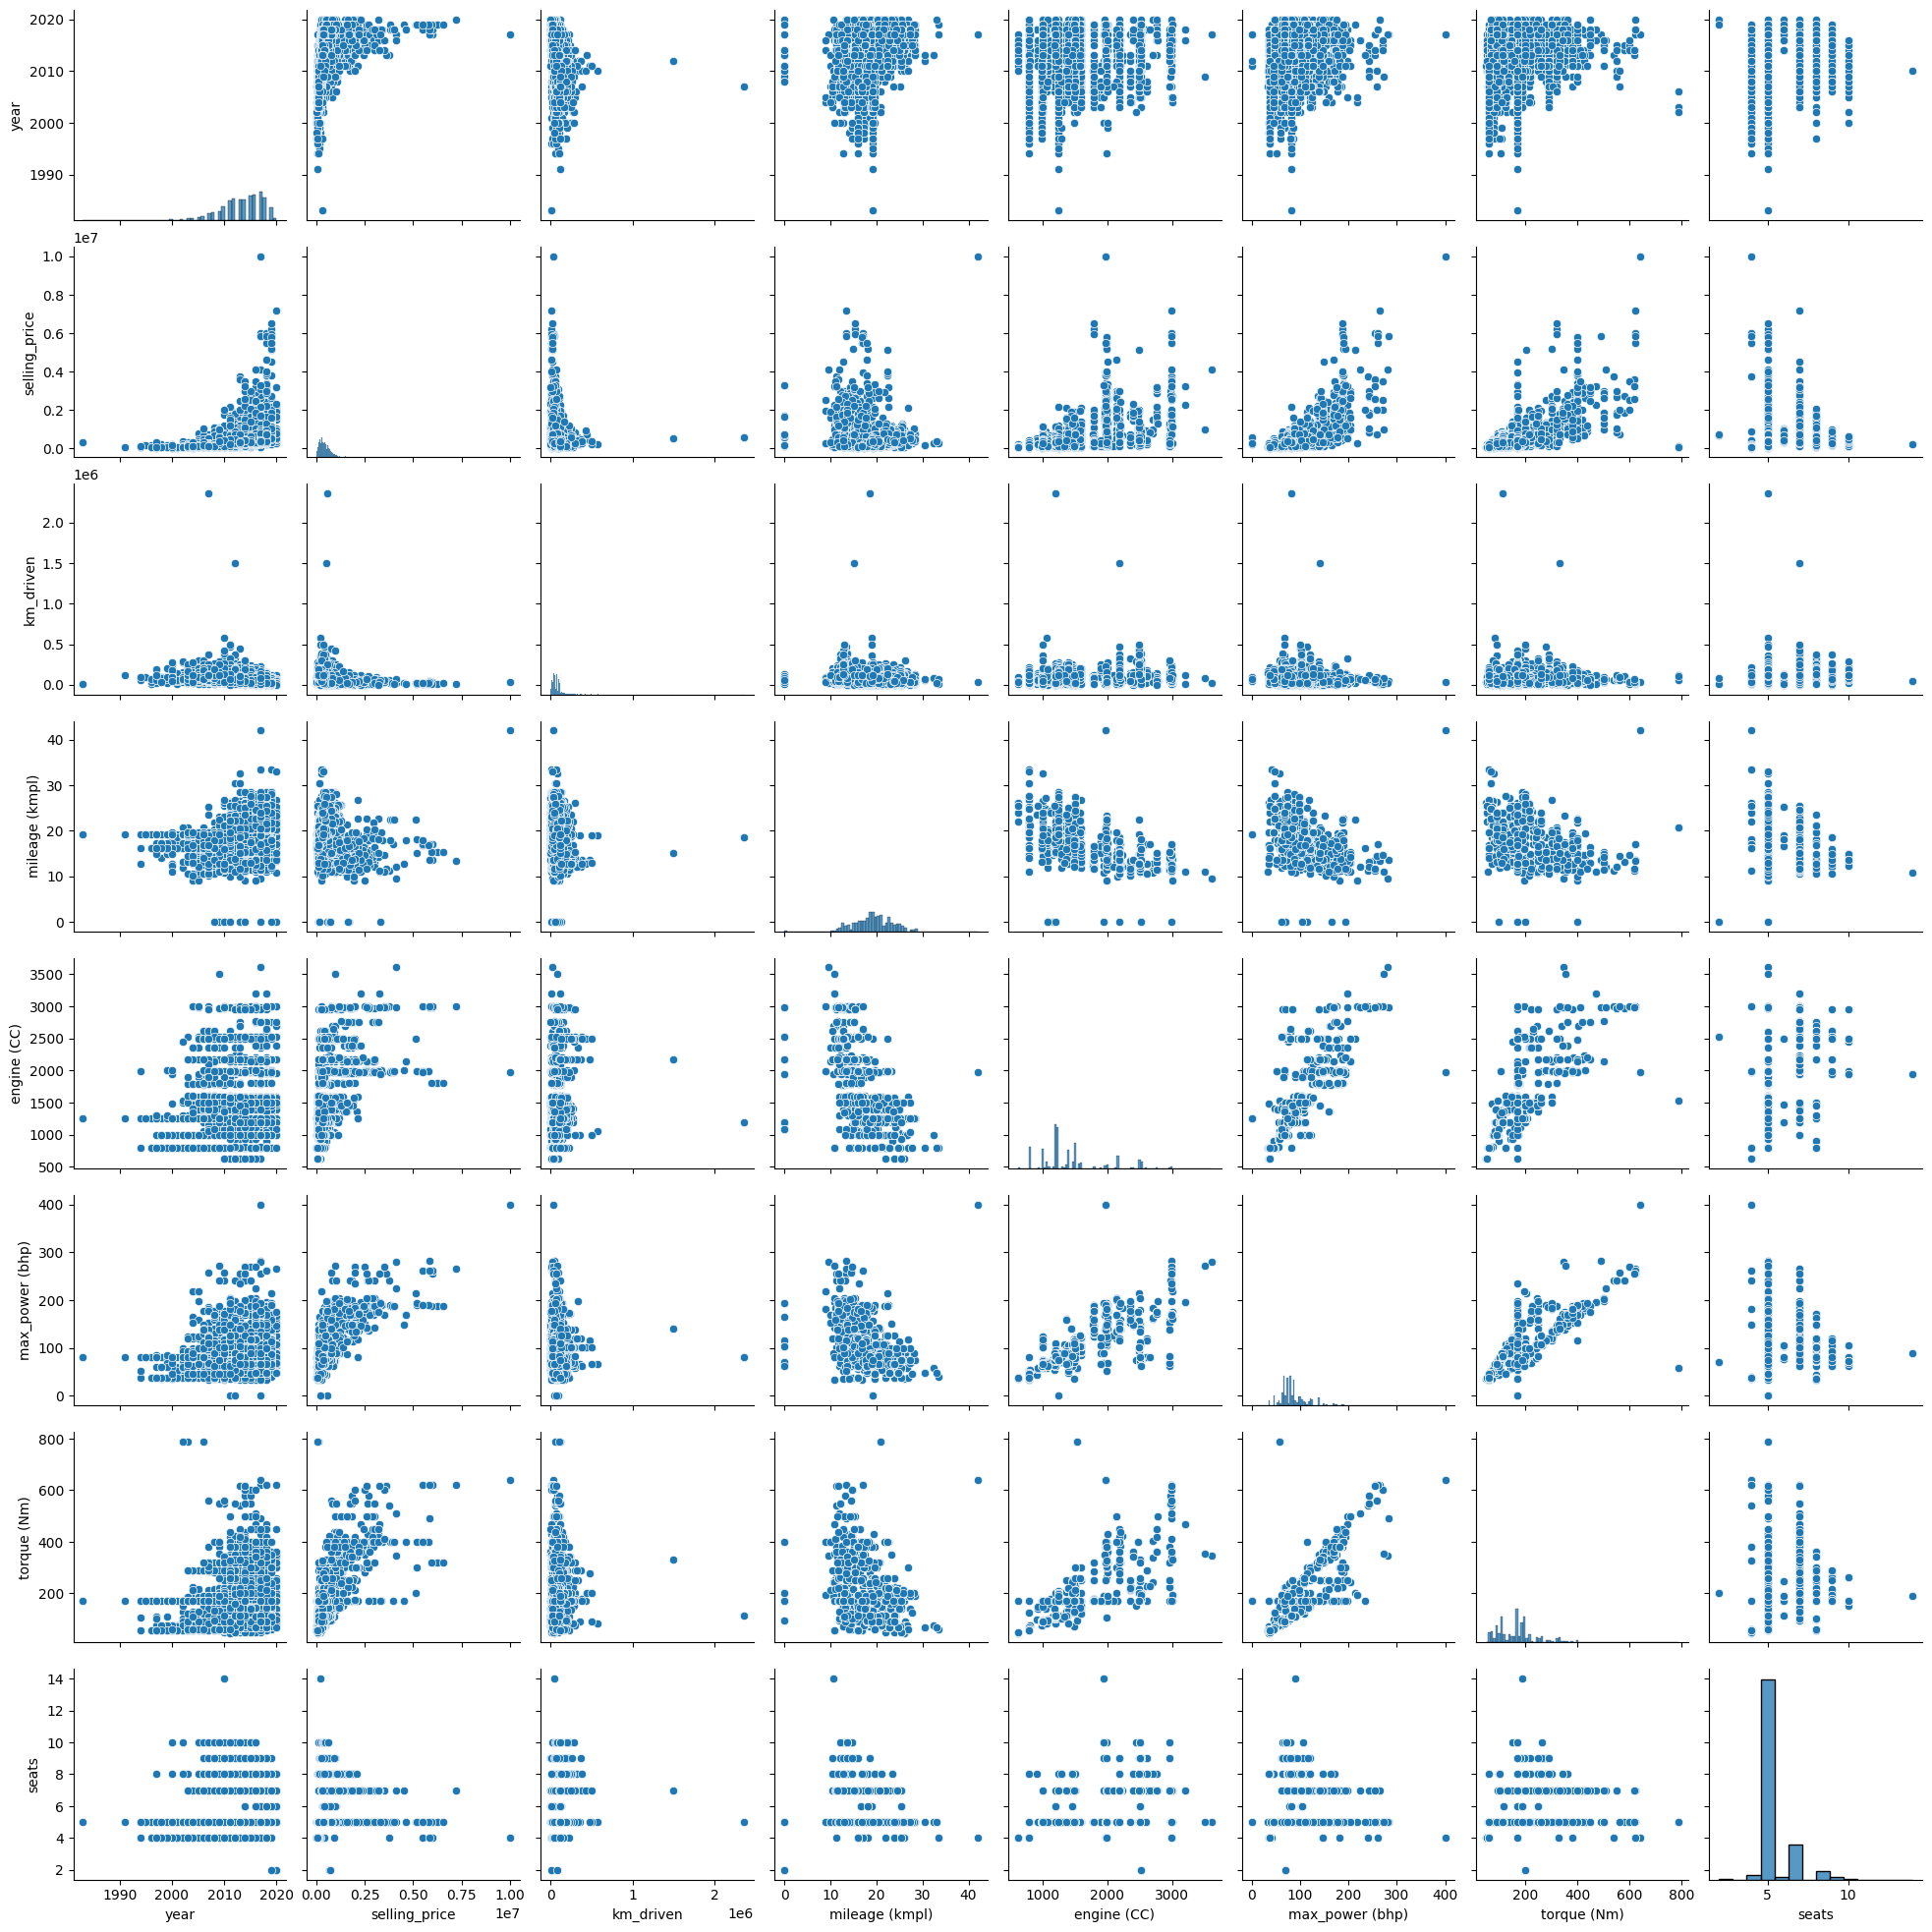

In [733]:
sns.pairplot(df_train)
plt.show()

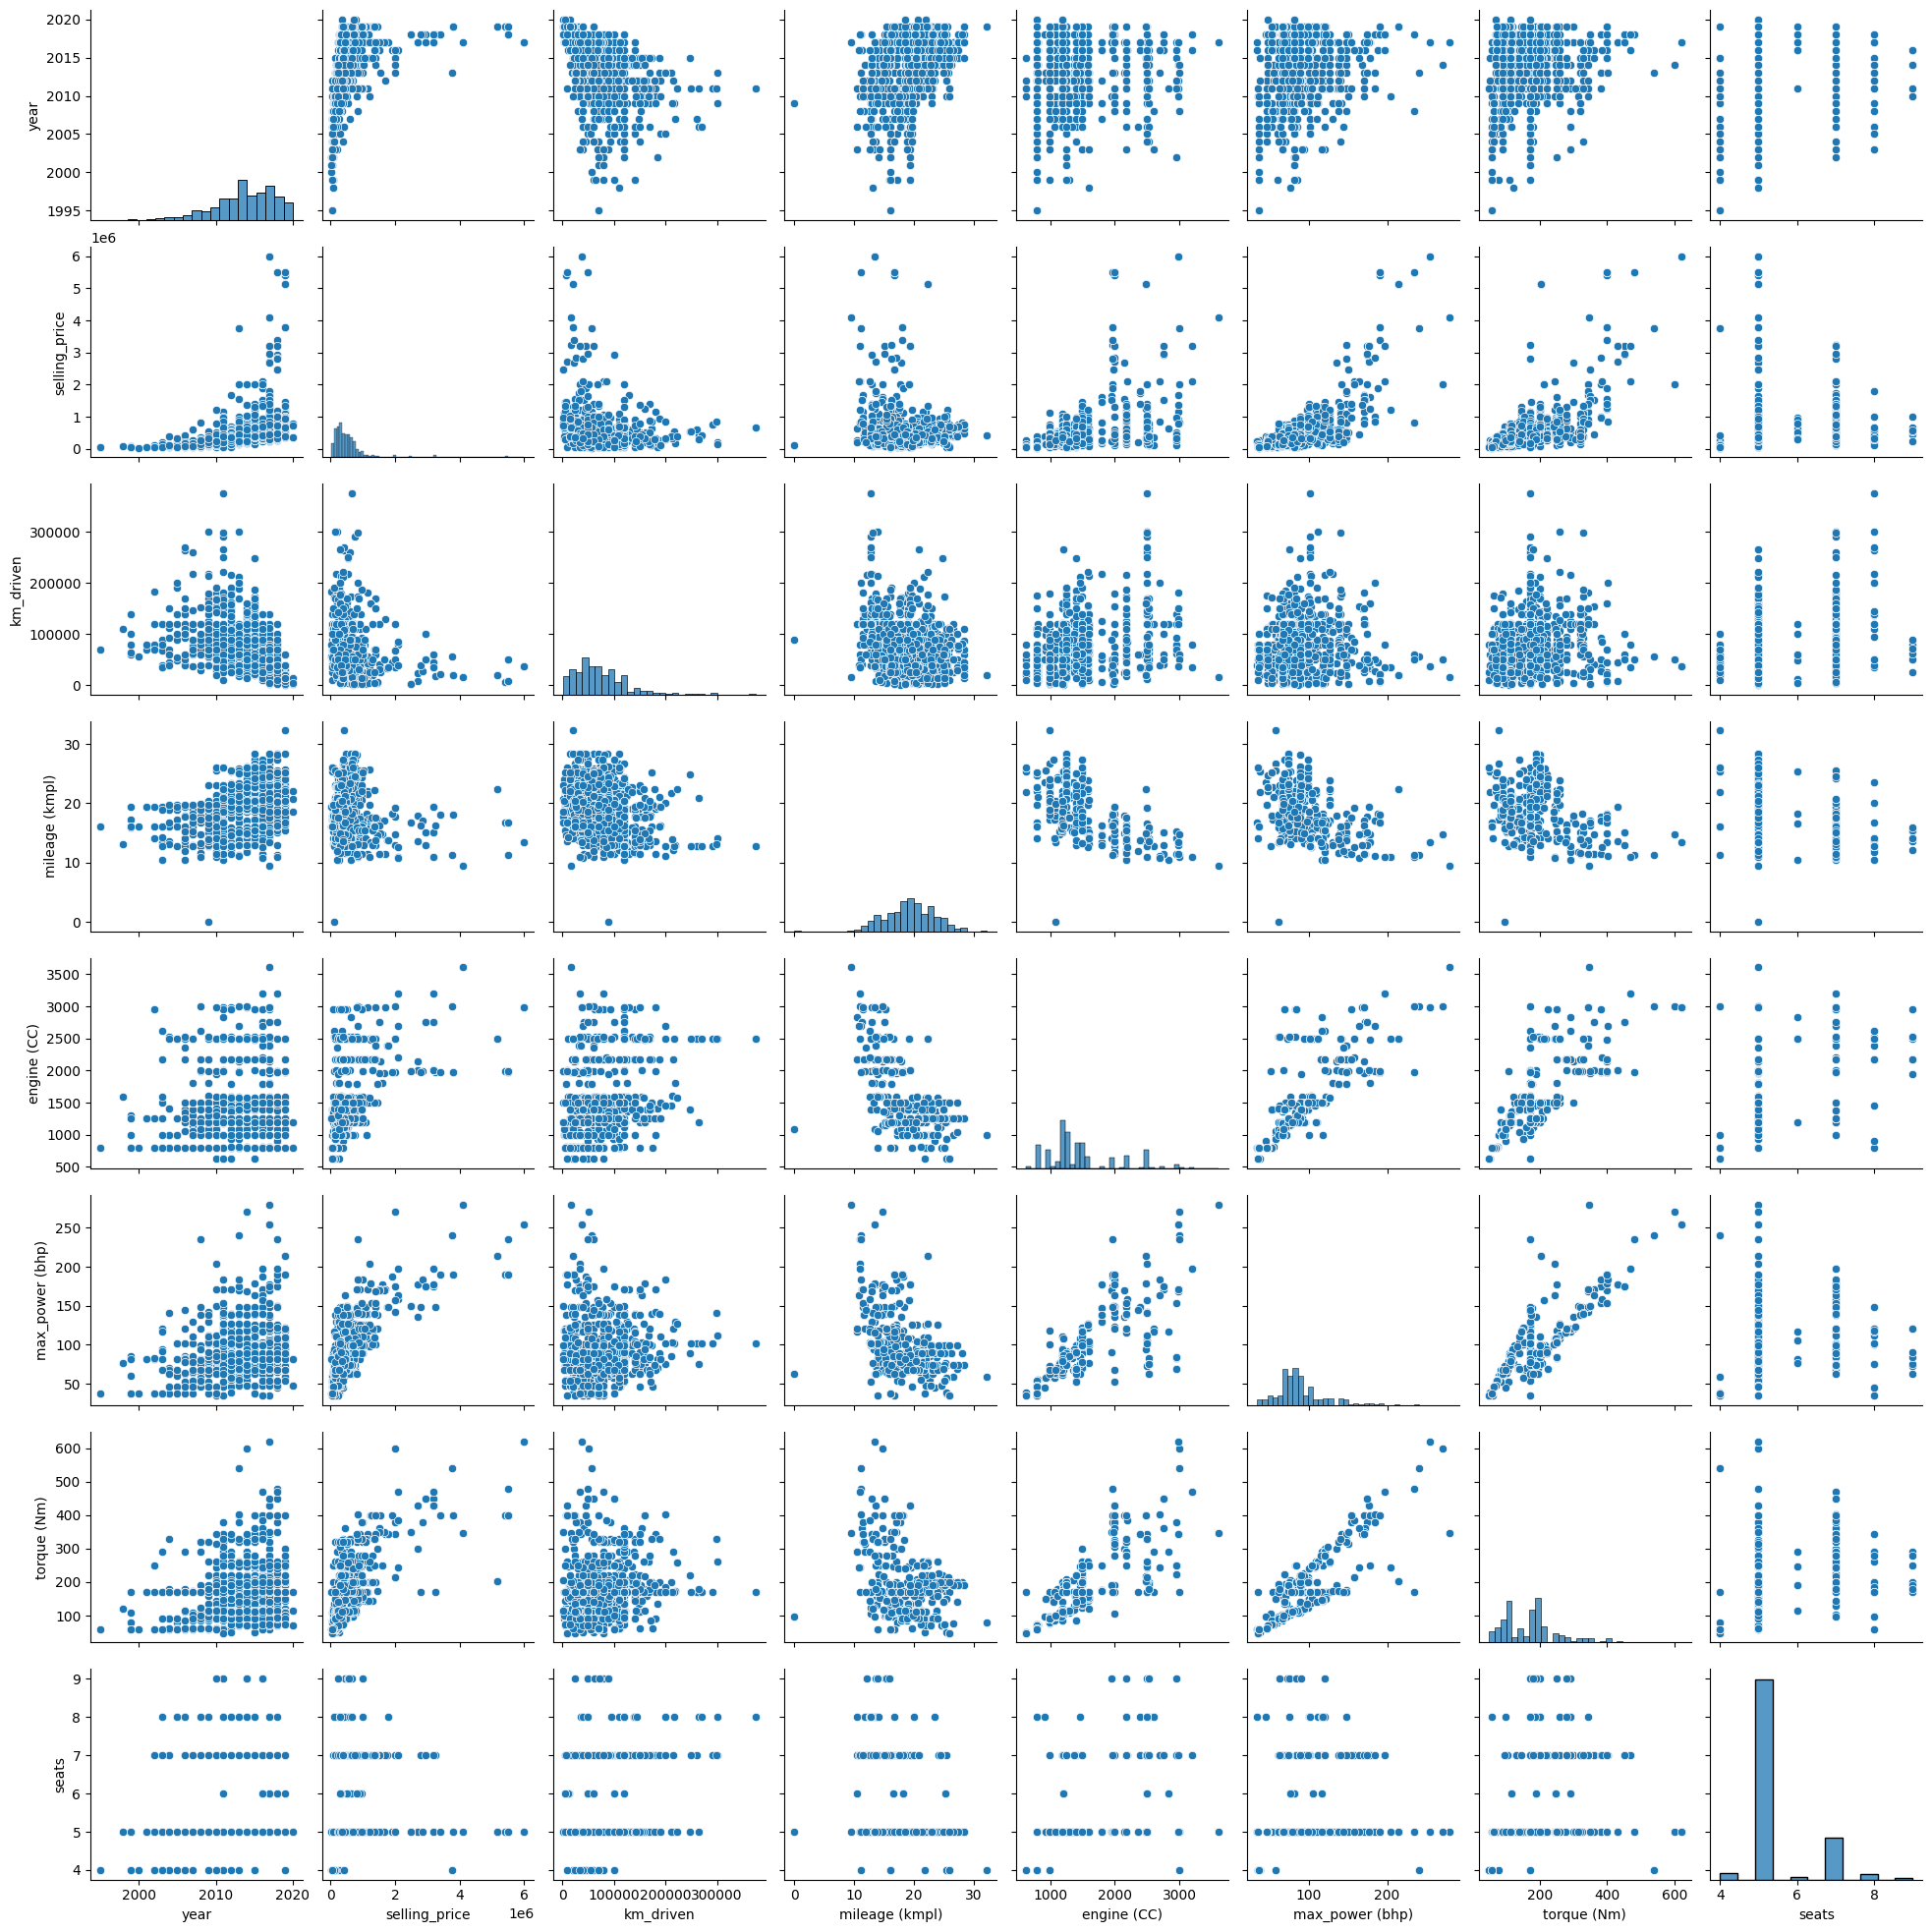

In [734]:
sns.pairplot(df_test)
plt.show()

Можно предположить следующие связи целевой переменной (selling price) с факторными переменными:  
* прямая связь с годом выпуска (чем новее машина, тем дороже она стоит)  
* обратная связь с пробегом (чем выше пробег, тем дешевле машина)  
* с километражем на литр (mileage) может быть обратная связь: чем меньше км проедет машина на одном литре бензина, тем она дешевле. Однако у данных большая гетероскедастичность и у меня нет уверенности что переменная будет статистически значимой  
* прямая связь с объемом двигателя, мощностью и крутящим моментом: чем больше, тем дороже автомобиль. Вполне вероятно что три переменных коллинеарны. В целом надо быть аккуратным при построении модели, могут нарушиться условия Гаусса-Маркова.
* обратная связт от количества посадочных мест: при их увеличении цена убывает. Связь выглядит неинтуитивно. С одной стороны двуместные спортивные автомобили могут стоить дороже остальных, однако цена минивэна должна быть выше, чем легковой машины.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


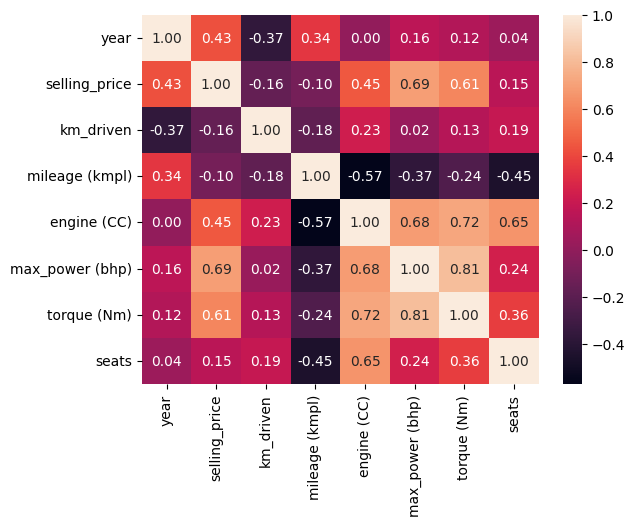

In [735]:
corr_train = df_train.select_dtypes(include='number').corr()

sns.heatmap(corr_train, annot=True, fmt='.2f')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Наименее скоррелированы между собой год и объем двигателя (коэффициент корреляции равен 0). С одной стороны, наверное объем должен в среднем уменьшаться, учитывая роста использования турбин. Однако в целом, по все годы выпускают модели с разнами объемами двигателей, в зависимости от класса автомобиля, его формата, массы и тп. В целом, противоречия нет.


Сильно скоррелированы объем двигателя, мощность и крутящий момент. В целом, это логично. Для построения модели можно попробовать взять только один фактор - мощность, как наиболее скоррелированный с ценой. Это позволит избежать мультиколлинеарности и переобучения.

Да, можно утверждать что чем меньше год, тем выше пробег. Коэффициент корреляции составляет -0.37, что свидетельствует об обратной связи.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

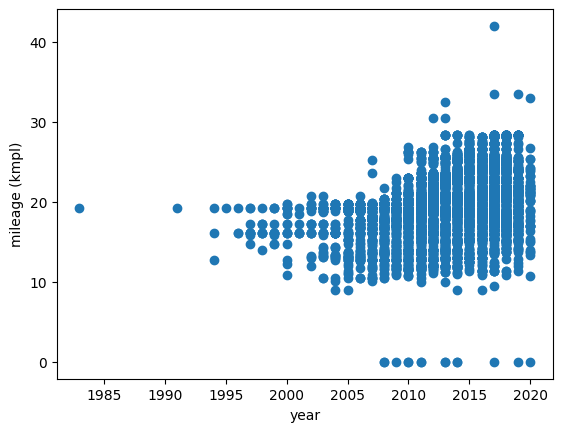

In [736]:
plt.scatter(x=df_train['year'], y=df_train['mileage (kmpl)'])
plt.xlabel('year')
plt.ylabel('mileage (kmpl)')
plt.show()

Интересно, что чем новее машина, тем больше км она может проехать с одного литра топлива. Коэффициент корреляции 0.34. Уменьшение расхода топлива в более новых машинах можно объяснить заботой об экологии и стремлением делать более экономичные автомобили (поскольку топливо достаточно дорогое).

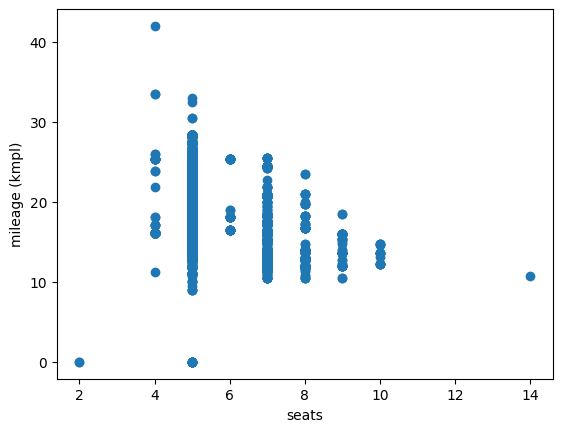

In [737]:
plt.scatter(x=df_train['seats'], y=df_train['mileage (kmpl)'])
plt.xlabel('seats')
plt.ylabel('mileage (kmpl)')
plt.show()

Видим, что автомобили где больше посадочных мест могуть проехать меньше км с одного литра топлива. Это можно объяснить тем, что на такие авто как компакт-вэны и мини-вэны ставят более объемные двигатели (корреляция engine CC - seats 0.65), которые расходуют больше топлива

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [738]:
y_train = df_train['selling_price']
X_train = df_train[['km_driven', 'mileage (kmpl)', 'engine (СС)', 'max_power (bhp)', 'torque (Nm)', 'seats']]

In [739]:
assert X_train.shape == (5840, 6)

In [740]:
y_test = df_test['selling_price']
X_test = df_test[['km_driven', 'mileage (kmpl)', 'engine (СС)', 'max_power (bhp)', 'torque (Nm)', 'seats']]

In [741]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [742]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

mse_train = MSE(y_train, y_pred_train_lr)
r2_train = r2_score(y_train, y_pred_train_lr) * 100

mse_test = MSE(y_test, y_pred_test_lr)
r2_test = r2_score(y_test, y_pred_test_lr) * 100

print(f'MSE (train): {mse_train:,.2f}')
print(f'MSE (test): {mse_test:,.2f}')
print(f'R2 (train): {r2_train:.0f}%')
print(f'R2 (test): {r2_test:.0f}%')

MSE (train): 131,309,196,577.32
MSE (test): 246,911,860,178.30
R2 (train): 54%
R2 (test): 57%


В целом качество модели только на количественных признаках невысокое. R2 57% на тестовой выборке это очень низкое значение.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [743]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr.fit(X_train_scaled, y_train)

y_pred_train_scaled = lr.predict(X_train_scaled)
y_pred_test_scaled = lr.predict(X_test_scaled)

mse_train_scaled = MSE(y_train, y_pred_train_scaled)
r2_train_scaled = r2_score(y_train, y_pred_train_scaled) * 100

mse_test_scaled = MSE(y_test, y_pred_test_scaled)
r2_test_scaled = r2_score(y_test, y_pred_test_scaled) * 100

print(f'MSE (train scaled): {mse_train_scaled:,.2f}')
print(f'MSE (test scaled): {mse_test_scaled:,.2f}')
print(f'R2 (train scaled): {r2_train_scaled:.0f}%')
print(f'R2 (test scaled): {r2_test_scaled:.0f}%')

MSE (train scaled): 131,309,196,577.32
MSE (test scaled): 246,911,860,178.30
R2 (train scaled): 54%
R2 (test scaled): 57%


Коэффициент детерминации и MSE не изменился. Видимо модель не сильно чувствительна к масштабу.

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [744]:
print(lr.coef_)

[-98325.05470814  93513.66672347  41695.89972845 333796.7610759
  52463.52239045  13561.33482742]


Наиболее информативным с точки зрения максимального по модулю признака оказался seats (число посадочных мест в машине).

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [745]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)

lasso.fit(X_train_scaled, y_train)

y_pred_train_lasso = lasso.predict(X_train_scaled)
y_pred_test_lasso = lasso.predict(X_test_scaled)

mse_train_lasso = MSE(y_train, y_pred_train_lasso)
r2_train_lasso = r2_score(y_train, y_pred_train_lasso) * 100

mse_test_lasso = MSE(y_test, y_pred_test_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso) * 100

print(f'MSE (train lasso): {mse_train_lasso:,.2f}')
print(f'MSE (test lasso): {mse_test_lasso:,.2f}')
print(f'R2 (train lasso): {r2_train_lasso:.0f}%')
print(f'R2 (test lasso): {r2_test_lasso:.0f}%')

MSE (train lasso): 131,309,196,584.45
MSE (test lasso): 246,912,311,233.27
R2 (train lasso): 54%
R2 (test lasso): 57%


In [746]:
print(lasso.coef_)

[-98324.00859692  93510.9937987   41694.22072692 333795.25632692
  52464.67891198  13559.96919135]


Модель не занулила ни одного веса. При этом даже если увеличить параметр альфа, зануление также не происходит. На мой взгляд причиной может быть то, что модель считает все признакми важными для прогноза.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [747]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

lasso = Lasso()

pipeline = Pipeline([
    ('scaler', scaler),
    ('lasso', lasso)
])

param_grid = {
    'lasso__alpha': np.logspace(-2, 4, 500) 
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"Лучший параметр alpha: {grid_search.best_params_['lasso__alpha']:.0f}")
print(f"Лучший MSE: {-grid_search.best_score_:,.0f}")
print(f"Коэффициенты регрессии: {grid_search.best_estimator_.named_steps['lasso'].coef_}")

Лучший параметр alpha: 2242
Лучший MSE: 137,450,195,531
Коэффициенты регрессии: [-95925.47352124  87532.44883828  37688.67734637 330681.052436
  54958.47018378  10625.17508766]


In [748]:
lasso = Lasso(alpha=2243)

lasso.fit(X_train_scaled, y_train)

y_pred_train_lasso = lasso.predict(X_train_scaled)
y_pred_test_lasso = lasso.predict(X_test_scaled)

mse_train_lasso = MSE(y_train, y_pred_train_lasso)
r2_train_lasso = r2_score(y_train, y_pred_train_lasso) * 100

mse_test_lasso = MSE(y_test, y_pred_test_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso) * 100

print(f'MSE (train lasso): {mse_train_lasso:,.2f}')
print(f'MSE (test lasso): {mse_test_lasso:,.2f}')
print(f'R2 (train lasso): {r2_train_lasso:.0f}%')
print(f'R2 (test lasso): {r2_test_lasso:.0f}%')

MSE (train lasso): 131,345,053,055.33
MSE (test lasso): 247,946,802,039.63
R2 (train lasso): 54%
R2 (test lasso): 57%


Ответы:
* 10 000 моделей, поскольку были заданы 500 параметров alpha между 10^-2 и 10^4
* Наилучший коэффициент регуляризации 2242 (однако значение MSE получилось хуже, чем при alpha = 1, возможно это связано с разными подходами - применением кросс-валидации в GridSearch, близкими значениями MSE для широкого диапазона alpha - как видно на графике ниже)
* Коэффициенты не занулились

Визуализируем результаты обучения:

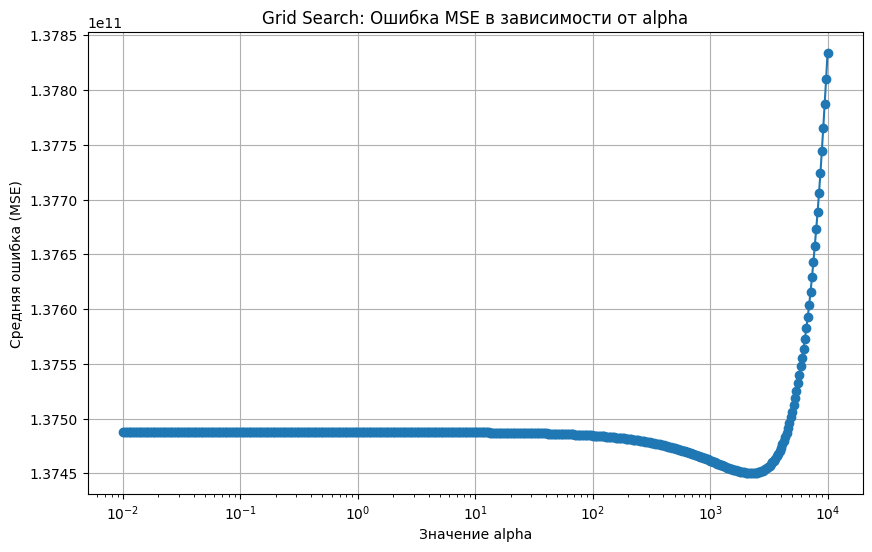

In [749]:
results = grid_search.cv_results_

plt.figure(figsize=(10, 6))
plt.semilogx(results['param_lasso__alpha'], -results['mean_test_score'], marker='o', linestyle='-')
plt.title('Grid Search: Ошибка MSE в зависимости от alpha')
plt.xlabel('Значение alpha')
plt.ylabel('Средняя ошибка (MSE)')
plt.grid()
plt.show()

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [750]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()

pipeline = Pipeline([
    ('scaler', scaler),
    ('elastic_net', elastic_net)
])

param_grid = {
    'elastic_net__alpha': np.logspace(-2, 4, 200),  
    'elastic_net__l1_ratio': np.linspace(0, 1, 10) 
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10, 
                           scoring='neg_mean_squared_error', n_jobs=-1,
                           verbose=0)

grid_search.fit(X_train, y_train)

print(f"Лучший alpha: {grid_search.best_params_['elastic_net__alpha']:.0f}")
print(f"Лучший l1_ratio: {grid_search.best_params_['elastic_net__l1_ratio']:.2f}")
print(f"Лучший MSE: {-grid_search.best_score_:,.0f}")
print(f"Коэффициенты регрессии: {grid_search.best_estimator_.named_steps['elastic_net'].coef_}")

/Users/pavel/Documents/HSE-AI/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.989e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/pavel/Documents/HSE-AI/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.613e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one o

Лучший alpha: 2171
Лучший l1_ratio: 1.00
Лучший MSE: 137,450,234,177
Коэффициенты регрессии: [-96001.19106879  87722.01496679  37812.88206456 330781.96617685
  54879.05284037  10719.74402201]


/Users/pavel/Documents/HSE-AI/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.535e+14, tolerance: 1.507e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Ответ:
* Обучилось 2000 моделей (200 по альфе Х 10 l1-ratio)
* Лучший параметр l1_ratio: 1.00 - следовательно наилучшее значение совпадает с лассо-регуляризацией с параметром alpha 2171 (в целом близко к 2242, полученному ранее)

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [751]:
X_train_cat = df_train.drop(['name', 'selling_price'], axis=1)
X_test_cat = df_test.drop(['name', 'selling_price'], axis=1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [752]:
X_train_cat_1 = df_train.drop('selling_price', axis=1).copy()

In [753]:
X_train_cat_1.name.value_counts()

name
Maruti Swift Dzire VDI                          91
Maruti Alto 800 LXI                             58
Maruti Alto LXi                                 56
Maruti Swift VDI                                48
Maruti Swift VDI BSIV                           47
                                                ..
Honda Amaze S AT i-Vtech                         1
Honda Jazz 1.2 SV i VTEC                         1
Maruti Baleno Zeta                               1
Honda Civic 1.8 (E) MT                           1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV     1
Name: count, Length: 1924, dtype: int64

Мы видим, что колонка Name содержит ценную информацию от марке и модели автомобиля. Данная информация также может быть ценной для моделирования, в связи с этим можно было бы сгенерировать две новых фичи: марка и модель

In [754]:
X_train_cat_1[['brand', 'model']] = X_train_cat_1['name'].str.split(n=2, expand=True)[[0, 1]]

X_train_cat_1.drop(columns=['name'], inplace=True)

In [755]:
X_train_cat_1.brand.value_counts()[:5]

brand
Maruti      1804
Hyundai     1058
Mahindra     611
Tata         534
Toyota       309
Name: count, dtype: int64

In [756]:
X_train_cat_1.model.value_counts()[:5]

model
Swift     558
Alto      316
i20       247
Wagon     205
Innova    160
Name: count, dtype: int64

In [757]:
assert X_train_cat.shape == (5840, 11) # поставил 11 столбцов, потому что не удалял столбец torque а обработал его

In [758]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [759]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
columns_for_scaling = ['year', 'km_driven', 'mileage (kmpl)', 'engine (СС)', 'max_power (bhp)', 'torque (Nm)']

categorical_transformer = OneHotEncoder(drop='first')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, columns_for_scaling)
    ])

X_train_transformed = preprocessor.fit_transform(X_train_cat)
X_test_transformed = preprocessor.transform(X_test_cat)

X_train_transformed_df = pd.DataFrame(X_train_transformed)
X_test_transformed_df = pd.DataFrame(X_test_transformed)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [773]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

rm = Ridge()

param_grid = {
    'alpha': np.logspace(-3, 3, 100)
}

gs = GridSearchCV(estimator=rm, param_grid=param_grid, scoring='r2', cv=10, n_jobs=-1)

gs.fit(X_train_transformed_df, y_train)

best_r2 = gs.best_score_
best_alpha = gs.best_params_['alpha']

print(f"Лучшие alpha: {best_alpha}")
print(f"Лучшее значение R^2: {best_r2:.2f}")


Лучшие alpha: 6.5793322465756825
Лучшее значение R^2: 0.63


In [761]:
rm = Ridge(alpha=6.5793322465756825)

rm.fit(X_train_transformed_df, y_train)

y_pred_train_ridge = rm.predict(X_train_transformed_df)
y_pred_test_ridge = rm.predict(X_test_transformed_df)

mse_train = MSE(y_train, y_pred_train_ridge)
r2_train = r2_score(y_train, y_pred_train_ridge) * 100

mse_test = MSE(y_test, y_pred_test_ridge)
r2_test = r2_score(y_test, y_pred_test_ridge) * 100

print(f'MSE (train ridge): {mse_train:,.2f}')
print(f'MSE (test ridge): {mse_test:,.2f}')
print(f'R2 (train ridge): {r2_train:.0f}%')
print(f'R2 (test ridge): {r2_test:.0f}%')

MSE (train ridge): 97,095,116,968.99
MSE (test ridge): 201,661,634,197.57
R2 (train ridge): 66%
R2 (test ridge): 65%


Да, удалось значительно улучшить качество модели: R2 увеличился с 57% до 65% на тестовой выборке, также существенно снизилась MSE с 247 млн. до 202 млн.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [763]:
type(y_pred_test_ridge)

numpy.ndarray

In [772]:
def business_metric(y_true, y_pred):
    assert y_true.shape[0] == y_pred.shape[0]
    pred_diff = []
    
    for true_price, pred_price in zip(y_true, y_pred):
        if abs((pred_price / true_price - 1) * 100) < 10:
            pred_diff.append(0)
        else:
            pred_diff.append(1)
    
    share_10 = (sum(pred_diff) / len(pred_diff)) * 100
    return share_10

print('Доля прогнозов, отличающихся от реальных цен более чем на 10% в ту или иную сторону:')
print(f'Простая линейная регрессия (без стандартизации): {business_metric(y_test, y_pred_test_lr):.2f}')
print(f'Простая линейная регрессия (со стандартизацией): {business_metric(y_test, y_pred_test_scaled):.2f}')
print(f'Лассо: {business_metric(y_test, y_pred_test_lasso):.2f}')
print(f'Ridge с категориальными признаками: {business_metric(y_test, y_pred_test_ridge):.2f}')

Доля прогнозов, отличающихся от реальных цен более чем на 10% в ту или иную сторону:
Простая линейная регрессия (без стандартизации): 82.00
Простая линейная регрессия (со стандартизацией): 82.00
Лассо: 81.90
Ridge с категориальными признаками: 75.30


Исходя из бизнес метрики, наименьшую долю дает модель Ridge регрессии с категориальными признаками. Данная модель также является наилучшей с т.з. коэффициента детерминации.

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

